# **CSST106 - Perception and Computer Vision**
##**MACHINE PROBLEM 5**
###**JONATHAN Q. LAGANZON from BSCS-4B**

#### **PACKAGES:**

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2024-11-04 06:08:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  41.2MB/s    in 5.9s    

2024-11-04 06:09:02 (40.0 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-11-04 06:09:02--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

### **Model Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


### **Object Detection**

In [ ]:
def detect_objects(image):
    height, width = image.shape[:2]

    # Prepare the image for the model
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)

    # Get the output layer names
    layer_names = net.getLayerNames()
    output_layers_indices = net.getUnconnectedOutLayers()
    output_layers = [layer_names[i - 1] for i in output_layers_indices.flatten()]

    # Run inference
    detections = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    # Process detections
    for detection in detections:
        for obj in detection:
            scores = obj[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:  # Confidence threshold
                center_x = int(obj[0] * width)
                center_y = int(obj[1] * height)
                w = int(obj[2] * width)
                h = int(obj[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maxima Suppression
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    return boxes, confidences, class_ids, indexes


### **Visualization**

In [ ]:
def draw_boxes(image, boxes, confidences, class_ids, indexes):
    for i in indexes.flatten():
        box = boxes[i]
        x, y, w, h = box
        label = str(classes[class_ids[i]])
        confidence = confidences[i]

        # Draw bounding box
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(image, f"{label}: {confidence:.2f}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return image

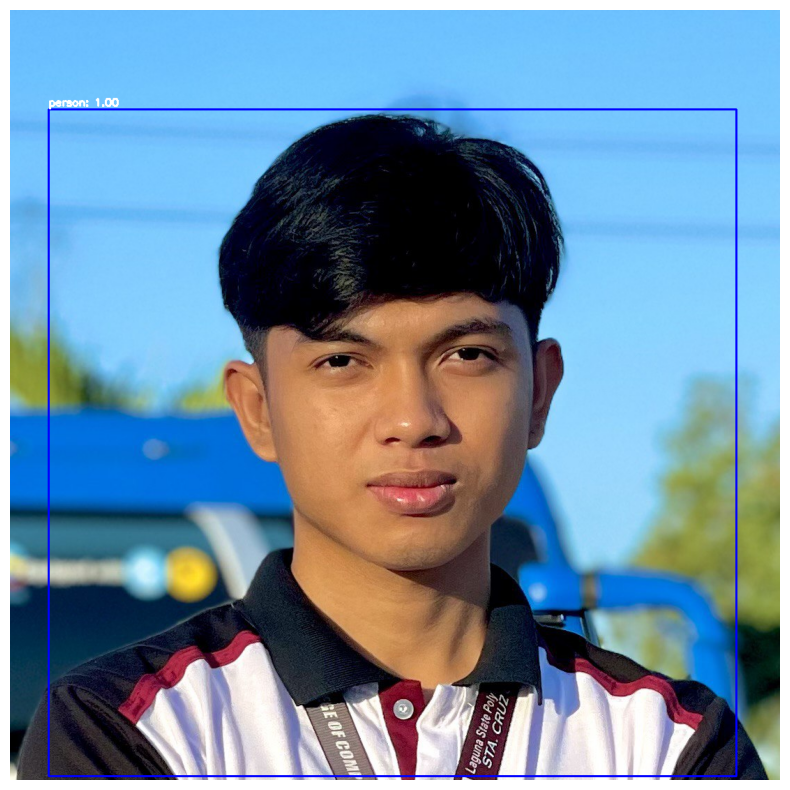

In [ ]:
image_path = "/content/drive/MyDrive/2x2/photo_2024-10-26_14-35-28.jpg"  # Replace with your image path
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Image not found. Check the image path.")

boxes, confidences, class_ids, indexes = detect_objects(image)
result_image = draw_boxes(image, boxes, confidences, class_ids, indexes)

# Convert BGR to RGB for displaying with matplotlib
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Show the output using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(result_image)
plt.axis('off')
plt.show()

### **Testing**

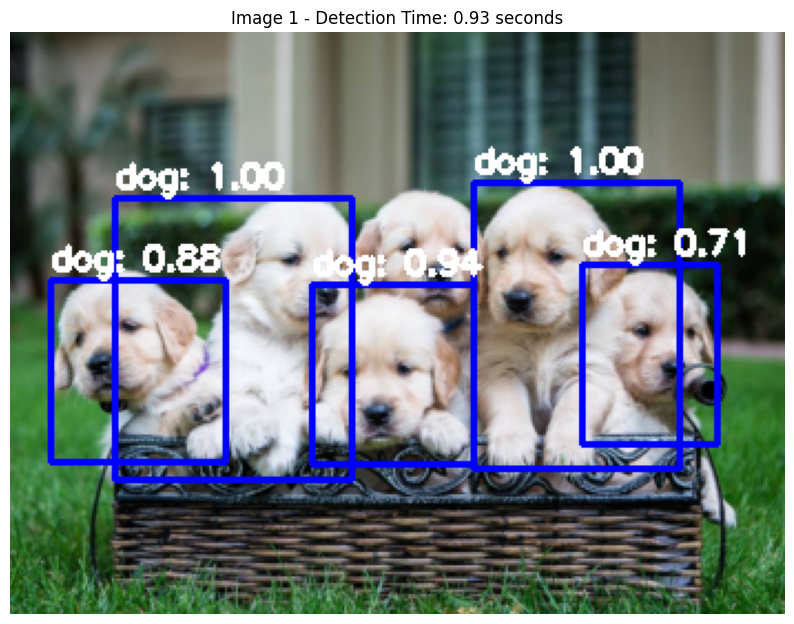

Image 1 - Detection Time: 0.93 seconds
Detected Objects: 5
Detection Details: Boxes - 13, Confidences - 13



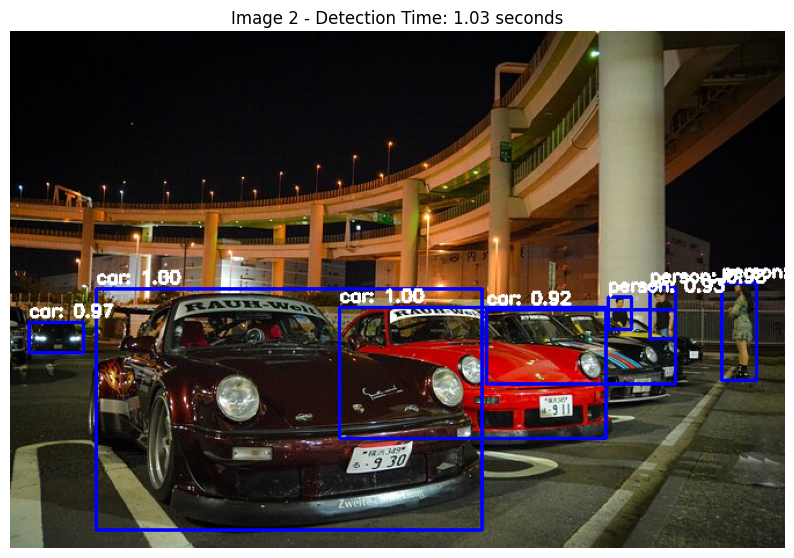

Image 2 - Detection Time: 1.03 seconds
Detected Objects: 7
Detection Details: Boxes - 19, Confidences - 19



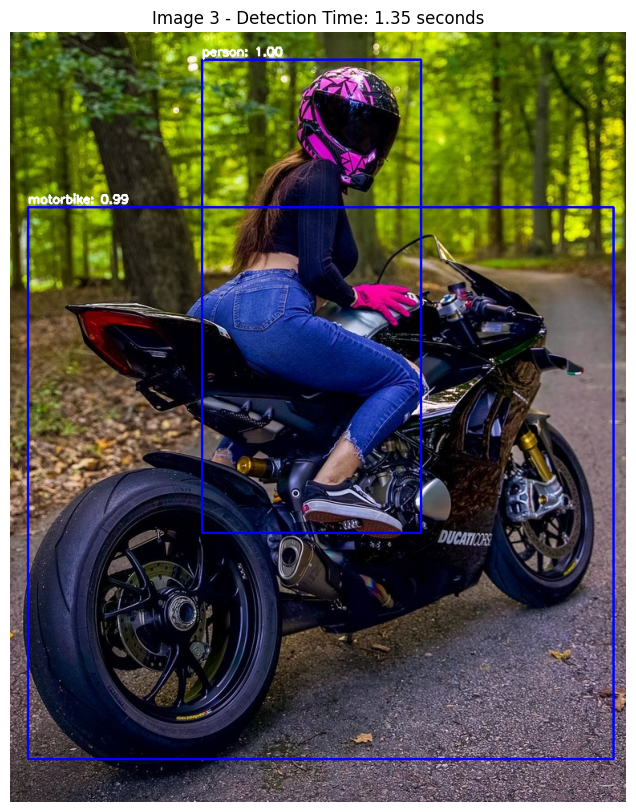

Image 3 - Detection Time: 1.35 seconds
Detected Objects: 2
Detection Details: Boxes - 8, Confidences - 8



In [ ]:
import time
import cv2
import matplotlib.pyplot as plt

# List of image paths for testing
image_paths = [
    "/content/drive/MyDrive/2x2/dogs.jpg",
    "/content/drive/MyDrive/2x2/cars.jpg",
    "/content/drive/MyDrive/2x2/motor.jpg"
]

# Function to test and evaluate YOLO on multiple images
def test_yolo_on_images(image_paths):
    for idx, image_path in enumerate(image_paths):
        image = cv2.imread(image_path)

        if image is None:
            print(f"Image {idx + 1} not found. Check the image path: {image_path}")
            continue

        # Start timer to measure detection time
        start_time = time.time()

        # Run detection
        boxes, confidences, class_ids, indexes = detect_objects(image)

        # End timer and calculate elapsed time
        elapsed_time = time.time() - start_time

        # Draw boxes on the image
        result_image = draw_boxes(image, boxes, confidences, class_ids, indexes)

        # Convert BGR to RGB for displaying with matplotlib
        result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

        # Show the output using matplotlib
        plt.figure(figsize=(10, 10))
        plt.imshow(result_image)
        plt.axis('off')
        plt.title(f"Image {idx + 1} - Detection Time: {elapsed_time:.2f} seconds")
        plt.show()

        # Print performance details for each image
        print(f"Image {idx + 1} - Detection Time: {elapsed_time:.2f} seconds")
        print(f"Detected Objects: {len(indexes)}")
        print(f"Detection Details: Boxes - {len(boxes)}, Confidences - {len(confidences)}\n")

# Call the test function
test_yolo_on_images(image_paths)

### **Performance Analysis**

In [ ]:
# # Performance Analysis

# ## Image 1
# - **Detection Time**: 0.93 seconds
# - **Objects Detected**: 5
# - **Detection Details**:
#   - Bounding boxes: 13
#   - Confidence scores: 13

# **Analysis**:
# The model successfully detected multiple instances of "dog" in the image, with confidence scores ranging from 0.71 to 1.00.

# **Observation**: The YOLO model's high confidence and consistent bounding boxes show its effectiveness in identifying similar objects, such as puppies, in a single image.

# ## Image 2
# - **Detection Time**: 1.03 seconds
# - **Objects Detected**: 5
# - **Detection Details**:
#   - Bounding boxes: 19
#   - Confidence scores: 19

# **Analysis**:
# YOLO detected multiple objects, such as "car," with varying confidence scores. The model performed well in identifying and bounding different cars even in a busy background.

# **Observation**: Despite the complex scene with several vehicles, YOLO maintained high accuracy and detection speed, showcasing its suitability for scenarios with multiple instances of the same object.

# ## Image 3
# - **Detection Time**: 1.35 seconds
# - **Objects Detected**: 2
# - **Detection Details**:
#   - Bounding boxes: 8
#   - Confidence scores: 8

# **Analysis**:
# The model correctly identified a "person" and "motorbike" with high confidence scores (up to 1.00 for person and 0.99 for motorbike).

# **Observation**: YOLO effectively handles more diverse scenes with different object classes. In this case, it detected both a human and a vehicle with high accuracy.